# Project: **Interpolation** in **Blender 3D Animation Modeling**

## Group members
* Kwesi Obika - Wrote the runge.py modeling script
* Warren Fulton - Contributed in writing the introduction and about software usage
* Justin Deng - Explaination on Runge's Phenomenon and Lagrange Interpolation of the given function f(x). Present Bezier Curves as a possible solution.
* Gustav Solis - Rendered another bezier curve in Blender and added some info to notebooks




The following prompts may be useful, but you don't have to use them.

## Introduction

Objective - Model a given function



For our project we continued on the open source 3D animation sofwater, Blender. Blender allows us to create linear, quadratic, and higher order curves using things called Bezier curves and Bezier splines. 

To create a Bezier curve requires a series of control/anchor points that model a "path" that the curve will take as shown below:

In [1]:
%%html
<img src = ./breziercurve.png>

Here the path is specified by the control points $P_{0}, P_{1}, P_{2}, \text{ and }P_{3}$, while $t=\text{ step size between } R_{0} \text{ and } R_{1}$, and the red curve is the resulting Bezier spline. The main elements used in editing Bezier curves are the control points (points $P_{i}$) and the handles, which are the lines generated by $[Q_{0}, Q_{1}], [Q_{1}, Q_{2}], \text{ and } [R_{0}, R{1}]$. The handles move along specified path, while the point $B$ maps out the desired curve.

## Method

In our project we will create some of these Bezier splines to model the runge phenomenon of interpolation given by the following function.

$$f(x) = \frac{1}{1 + 10x^{2}}$$

If you look in the runge.py script we first create alinear space of 20 points between -1 and 1, these are the points we are trying to interpolate between. 

The bulk of the modeling is done in the following code block of runge.py

In [6]:


x = np.linspace(-1,1,20)	

ops.curve.primitive_bezier_curve_add(enter_editmode=True)
ops.curve.subdivide(number_cuts=18)

curve = context.active_object

bz_pts = curve.data.splines[0].bezier_points

len(bz_pts)
#20

for i in range(0,20):
    bz_pts[i].co = Vector((x[i], runge1(x[i]), 0.0))
    bz_pts[i].handle_left = Vector((0.0, 0.0, 0.0))
    bz_pts[i].handle_right = Vector((0.0, 0.0, 0.0))

ModuleNotFoundError: No module named 'bpy'

This sets all values of $f(x)$ above as the control points throughout the shape, and every control points handle's are centered at the origin. If we render the Bezier spline defined by these control points we get the following shape.

In [11]:
%%html
<img src = ./runge.jpg>

We can see that splines are beginning to model the function shape overall, however, since we have such few points to interpolate from we get spikes at every control point. But, if we can give it more points we can begin to smooth the shape out. 

For instance, lets see what happens when we give it a 1000 points instead of 20.

In [7]:
%%html
<img src = ./runge1000.png>

Here we can see that giving the Brezier spline more points to interpolate from allows it to more accurately model the given function, $f(x)$, obviously.

## Runge's Phenomenon

  Runge's phenomenon refers to the oscillation that occurs near the ends of a given interval of an interpolating function. In this section we will be demonstrating the diverging error that may occcur when using a interpolant found with Lagrange Interpolation of the given funtion:
  
  $$f(x) = \frac{1}{1+10x^{2}}$$

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np


def f(x):
    denominator = 1 + 10* x**2
    y_value = 1/denominator
    return y_value

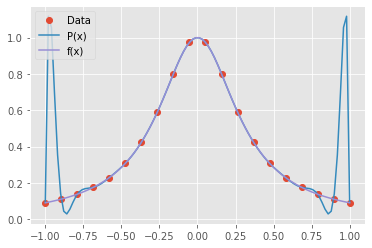

In [87]:
def y_values(x):
    num_points = x.size
    y_values = np.zeros(num_points)
    for i in range(num_points):
        y_values[i] = f(x[i])
    return y_values

def lagrange(x, y):
    @np.vectorize
    def p(t):
        from numpy import prod
        m = len(x) - 1
        w = 0
        for i in range(m):
            w += y[i] * (prod(t - x[:i]) * prod(t - x[i+1:])
                         / (prod(x[i] - x[:i]) * prod(x[i] - x[i+1:])))
        w += y[m] * prod(t - x[:m]) / prod(x[m] - x[:m])
        return w
    return p

def plotFunctionWitGivenPoints(n_points):
    x = x = np.linspace(-1,1,n_points)
    y = y_values(x)
    p = lagrange(x,y)
    
    
    x_0 = np.linspace(-1,1,100)
    plt.plot(x,y,'o',label='Data')
    plt.plot(x_0,p(x_0),label='P(x)')
    plt.plot(x_0,y_values(x_0), label='f(x)')
    plt.legend(loc='upper left');
    
    y_0 = y_values(x_0)
    error = np.zeros(x_0.size)
    for i in range(x_0.size):
        numerator =  p(x_0[i]) - y_0[i]
        error[i]= np.abs(numerator/p(x_0[i])) * 100
    return p,error

p,error = plotFunctionWitGivenPoints(20)

x_0 = np.linspace(-1,1,100)

total_error = 0

for i in range(x_0.size):
    total_error += error[i]

average_error = total_error / x_0.size



Average Error: 20.525263324264657


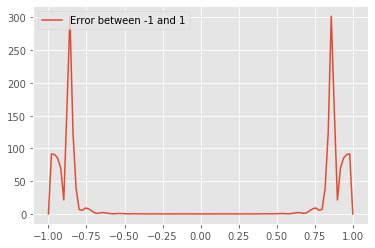

In [88]:
plt.plot(x_0, error,label='Error between -1 and 1')
plt.legend(loc='upper left');
print('Average Error:', average_error)

 If we take a look a the graph we notice that error of p(x) is mostly minimal, but from the interval $[-1,-0.75) \bigcup (0.75,1]$ the error is astronomically high. The error along this interval is so high that it inflates the average error to around 20.53. Coinidentally, this is where the oscillation occurs.
 
 Runge's concluded that higher order interpolation may not always be the appropriate form to interpolate a given dataset.
 

##  Bezier curve and the Bernstein polynomial

The Bezier curve is closly related to the Bernstein polynomial. Using a Bernstein polynomial on can apporimate every functions within a given closed interval uniformly. Though it is not a very effective method of finding a suitble interpolating polynomial, it can find one where the Lagrange interpolation fails.

Blender as software has a built in method to utilize Bezier curves; with this in mind, modeling the function f(x) become much more plusible. 